In [97]:
!cp "/content/drive/My Drive/Colab Notebooks/UTS_23758021.ipynb" "/content/UTS_23758021.ipynb"

In [9]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('dataset_stroke.csv')

# Menampilkan jumlah missing values di setiap kolom
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Jika ingin melihat persentase missing values juga:
print("\nPersentase Missing Values per Kolom:")
print((df.isnull().mean() * 100).round(2))


Jumlah Missing Values per Kolom:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Persentase Missing Values per Kolom:
id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Membaca dataset
df = pd.read_csv('dataset_stroke.csv')

# Menampilkan jumlah missing values sebelum diisi
print("Missing values sebelum diisi:")
print(df.isnull().sum())

# Mengisi nilai kosong di kolom 'bmi' dengan rata-rata
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)

# Mengecek kembali apakah masih ada missing values
print("\nMissing values setelah diisi:")
print(df.isnull().sum())

# Membuat instance LabelEncoder
label_encoder = LabelEncoder()

# Proses Label Encoding untuk kolom kategorikal
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Melakukan encoding pada semua kolom kategorikal
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Menyimpan dataset yang telah di-encode ke file baru
df.to_csv('dataset_encoding.csv', index=False)

# Menampilkan dataset yang telah diproses
print("\nDataset setelah pembersihan dan encoding telah disimpan sebagai 'dataset_encoding.csv'")
print(df.head())

Missing values sebelum diisi:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing values setelah diisi:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dataset setelah pembersihan dan encoding telah disimpan sebagai 'dataset_encoding.csv'
      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112 

In [22]:
!git commit -m "Menambahkan Dataset Yang Sudah Melalui Proses Encoding Dan Pembersihan Dari Outliers"

In [40]:
import pandas as pd

# Membaca dataset yang sudah diproses
df = pd.read_csv('dataset_encoding.csv')

# Menyimpan jumlah data sebelum pembersihan outliers
initial_row_count = df.shape[0]

# Pembersihan outlier hanya pada kolom 'bmi' menggunakan metode IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus baris yang nilai 'bmi'-nya di luar batas
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Menyimpan dataset yang telah dibersihkan ke dalam file baru
df.to_csv('dataset_no_outliers.csv', index=False)

# Menampilkan beberapa baris pertama dari dataset
print("Dataset setelah pembersihan kolom BMI:")
print(df.head())

# Menampilkan info jumlah data
final_row_count = df.shape[0]
print(f"\nJumlah data sebelum pembersihan: {initial_row_count}")
print(f"Jumlah data setelah pembersihan: {final_row_count}")
print(f"Jumlah data yang dihapus: {initial_row_count - final_row_count}")


Dataset setelah pembersihan kolom BMI:
      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  

Jumlah data sebelum pembersihan: 51

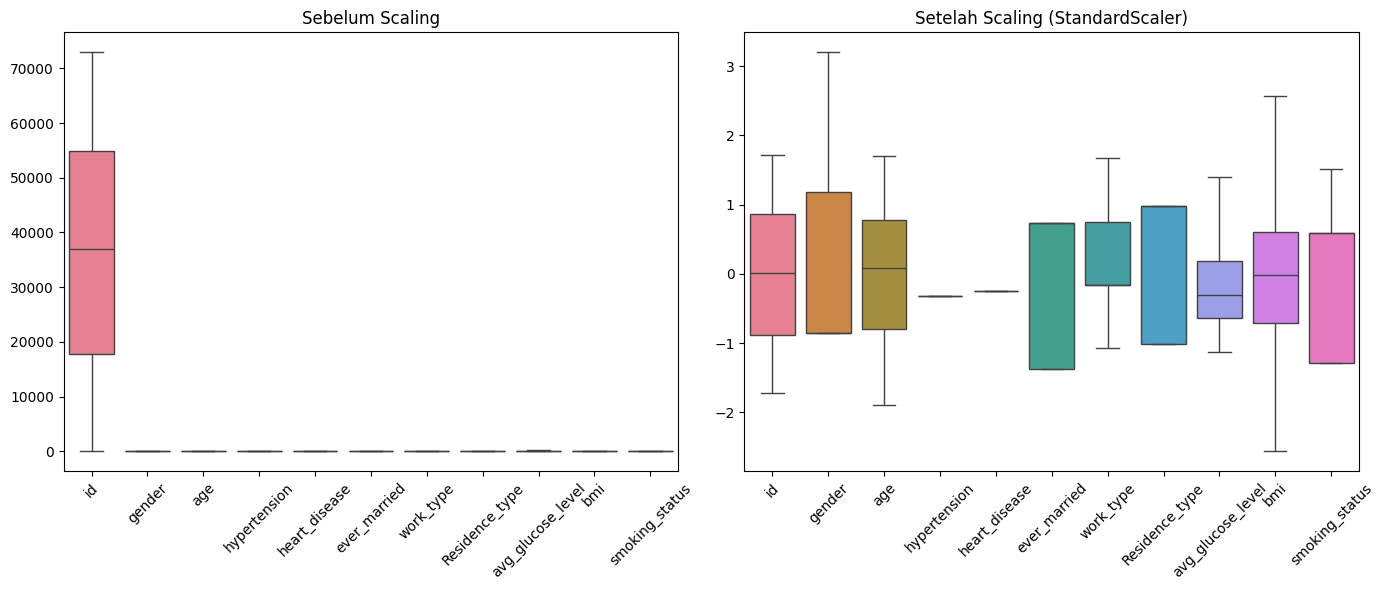

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Membaca dataset sebelum scaling (yang tanpa outlier)
df_original = pd.read_csv('dataset_no_outliers.csv')

# Memisahkan label
label = df_original['stroke']
df_features = df_original.drop('stroke', axis=1)

# Scaling
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(scaled_array, columns=df_features.columns)

# Visualisasi
plt.figure(figsize=(14, 6))

# Sebelum scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=df_features, showfliers=False)
plt.title('Sebelum Scaling')
plt.xticks(rotation=45)

# Setelah scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled, showfliers=False)
plt.title('Setelah Scaling (StandardScaler)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("visualisasi_scaling_dataset.png", dpi=300)
plt.show()


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Membaca dataset yang sudah dibersihkan
df = pd.read_csv('dataset_no_outliers.csv')

# Memisahkan fitur dan label
X = df.drop('stroke', axis=1)  # Fitur
y = df['stroke']               # Label

# Melakukan scaling pada fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggabungkan kembali hasil scaling dengan label
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['stroke'] = y.reset_index(drop=True)

# Menyimpan dataset hasil scaling
X_scaled_df.to_csv('dataset_scaled.csv', index=False)

print("Scaling selesai. Dataset tersimpan sebagai 'dataset_scaled.csv'")
print(X_scaled_df.head())


Scaling selesai. Dataset tersimpan sebagai 'dataset_scaled.csv'
         id    gender       age  hypertension  heart_disease  ever_married  \
0 -1.303185  1.175760  1.044337     -0.325323       4.138072      0.728823   
1  0.712544 -0.849115  0.781006     -0.325323      -0.241658      0.728823   
2 -0.259810  1.175760  1.614889     -0.325323       4.138072      0.728823   
3  1.114744 -0.849115  0.254343     -0.325323      -0.241658      0.728823   
4 -1.652190 -0.849115  1.571001      3.073864      -0.241658      0.728823   

   work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0  -0.160042        0.981708           2.743156  1.254246       -0.348354   
1   0.753647       -1.018633           2.152401  0.091826        0.583581   
2  -0.160042       -1.018633           0.004223  0.635838        0.583581   
3  -0.160042        0.981708           1.461254  0.922417        1.515515   
4   0.753647       -1.018633           1.525729 -0.646227        0.583581   

   s

Distribusi Kelas Awal:
 stroke
0    4738
1     246
Name: count, dtype: int64

Akurasi Model SVM: 0.7331995987963892

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.84       948
           1       0.14      0.90      0.25        49

    accuracy                           0.73       997
   macro avg       0.57      0.81      0.54       997
weighted avg       0.95      0.73      0.81       997



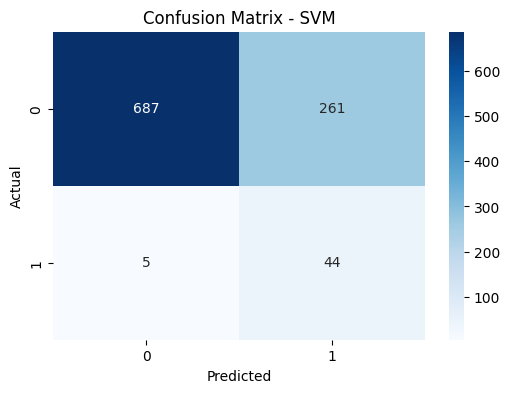

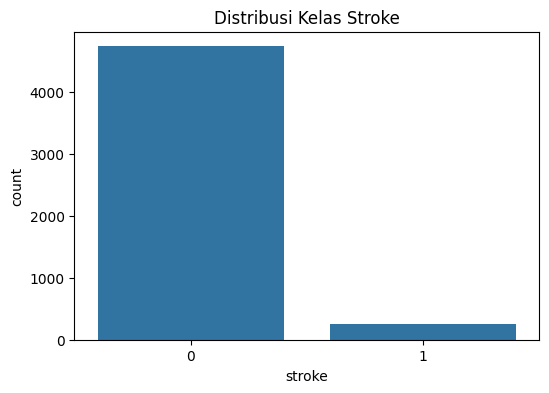

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Membaca dataset (tanpa kolom id)
df = pd.read_csv('dataset_scaled.csv')
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# 2. Cek distribusi kelas
print("Distribusi Kelas Awal:\n", df['stroke'].value_counts())

# 3. Memisahkan fitur dan label
X = df.drop('stroke', axis=1)
y = df['stroke']

# 4. Split data (gunakan stratify agar proporsi label tetap)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Model: Support Vector Machine (SVM) dengan class_weight='balanced'
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)

# 7. Prediksi
y_pred = svm.predict(X_test_scaled)

# 8. Evaluasi
print("\nAkurasi Model SVM:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Visualisasi distribusi kelas
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title("Distribusi Kelas Stroke")
plt.show()


In [67]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membaca dataset yang sudah discaled
df = pd.read_csv('dataset_scaled.csv')
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Memisahkan fitur dan label
X = df.drop('stroke', axis=1)  # Menghapus kolom 'stroke' (label)
y = df['stroke']  # Kolom 'stroke' adalah label

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model SVM dengan kernel linear dan class_weight='balanced'
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)

# Menampilkan koefisien fitur untuk SVM dengan kernel linear
coef = svm.coef_.flatten()  # Mengambil koefisien model dan meratakannya
feature_importance = pd.DataFrame(coef, index=X.columns, columns=['Importance'])  # Membuat DataFrame
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)  # Mengurutkan fitur berdasarkan pengaruhnya

# Menampilkan fitur yang paling berpengaruh
print("Fitur yang paling mempengaruhi model SVM:")
print(feature_importance)


Fitur yang paling mempengaruhi model SVM:
                   Importance
age                  1.294949
bmi                  0.119276
avg_glucose_level    0.103304
hypertension         0.092858
heart_disease        0.071396
Residence_type       0.022780
ever_married        -0.018420
gender              -0.024581
smoking_status      -0.032112
work_type           -0.046068



Akurasi Model SVM: 0.7271815446339017

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83       948
           1       0.14      0.88      0.24        49

    accuracy                           0.73       997
   macro avg       0.57      0.80      0.54       997
weighted avg       0.95      0.73      0.80       997



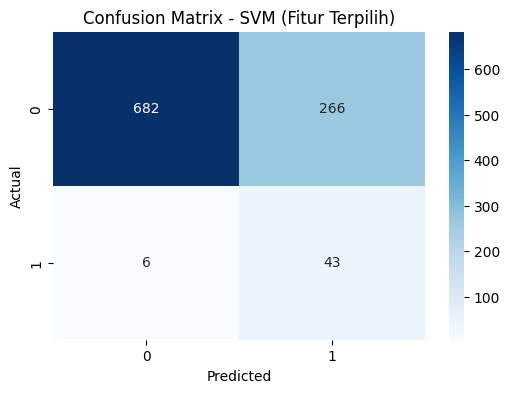

<Figure size 640x480 with 0 Axes>

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Membaca dataset (tanpa kolom id)
df = pd.read_csv('dataset_scaled.csv')
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# 2. Memilih fitur-fitur yang relevan
selected_features = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']
X = df[selected_features]  # Hanya fitur yang dipilih
y = df['stroke']  # Target variabel

# 3. Split data (gunakan stratify agar proporsi label tetap)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model: Support Vector Machine (SVM) dengan class_weight='balanced'
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)

# 6. Prediksi
y_pred = svm.predict(X_test_scaled)

# 7. Evaluasi
print("\nAkurasi Model SVM:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM (Fitur Terpilih)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Simpan visualisasi ke file
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')  # Simpan ke file PNG

with open("Classification_Report.txt", "w") as f:
    f.write(f"Akurasi Model SVM: {accuracy_score(y_test, y_pred)}\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))

plt.show()